In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE


%matplotlib inline

In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd,"DATA/try_data.csv")
filepath

'/Users/nalinrajendran/Desktop/STUDY/MIS  SIP PAPER/OUR CODE/GUI TRY/STREAMLIT/RNN/DATA/try_data.csv'

In [3]:
df = pd.read_csv(filepath)
df

,state,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,Kerala,2011,1,68,23.47,72.81,0.04,0.00,13.18,32.30,16.42,24.360,17.61
1,Kerala,2011,2,41,24.90,65.56,1.58,47.46,12.63,33.97,16.10,25.035,16.65
2,Kerala,2011,3,54,27.33,61.00,0.44,10.55,13.37,36.56,18.12,27.340,17.42
3,Kerala,2011,4,53,27.20,72.94,4.01,105.47,16.42,36.91,22.50,29.705,21.04
4,Kerala,2011,5,84,26.72,79.38,4.33,121.29,17.70,34.47,22.46,28.465,22.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kerala,2021,8,327,24.03,90.50,8.42,261.11,17.52,28.51,20.41,24.460,22.26
128,Kerala,2021,9,194,24.33,90.50,7.28,218.52,17.82,29.17,21.54,25.355,22.57
129,Kerala,2021,10,215,24.67,90.38,13.33,413.24,18.19,28.85,22.11,25.480,22.90
130,Kerala,2021,11,192,24.08,90.06,10.07,302.14,17.52,28.38,20.90,24.640,22.27


In [4]:
df1 = df.reset_index()['cases']
df1

0       68
1       41
2       54
3       53
4       84
      ... 
127    327
128    194
129    215
130    192
131    261
Name: cases, Length: 132, dtype: int64

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
#Taking the 80% of the data for training and 20% for testing.
training_size = int(len(df1)*0.8)
test_size= len(df1)-training_size

train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
#Using a time series approach. This makes the next value in the dataset dependent upon the preceeding values.

def create_dataset (dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
#Here we are considering the time setp as 2. So, the data on the 3rd month(say for an example),
#will be dependent upon the first two months.

time_step = 2
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [9]:
#Adding a third axis(reshaping) to the dataset.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
#Desining the neural network, by stacking the wanted layers, since it can automatically do the feature extraction 
#and reduce the number of parameters.

model = Sequential()
model.add(LSTM(11,return_sequences=True, input_shape=(2,1)))
model.add(LSTM(11,return_sequences=True))
model.add(LSTM(11))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = "adam")

In [11]:
#Training the model.

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=400, batch_size=38, verbose=1)

Epoch 1/400
3/3 [==============================] - 5s 451ms/step - loss: 0.0328 - val_loss: 0.0027
Epoch 2/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0314 - val_loss: 0.0022
Epoch 3/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0302 - val_loss: 0.0019
Epoch 4/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0288 - val_loss: 0.0017
Epoch 5/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0279 - val_loss: 0.0017
Epoch 6/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0269 - val_loss: 0.0018
Epoch 7/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0262 - val_loss: 0.0021
Epoch 8/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0256 - val_loss: 0.0025
Epoch 9/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0250 - val_loss: 0.0030
Epoch 10/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0247 - val_loss: 0.0035
Epoch 11/400
3/3 [

Epoch 84/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0160 - val_loss: 0.0025
Epoch 85/400
3/3 [==============================] - 0s 24ms/step - loss: 0.0160 - val_loss: 0.0025
Epoch 86/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0160 - val_loss: 0.0024
Epoch 87/400
3/3 [==============================] - 0s 24ms/step - loss: 0.0160 - val_loss: 0.0024
Epoch 88/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0160 - val_loss: 0.0024
Epoch 89/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0159 - val_loss: 0.0025
Epoch 90/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0159 - val_loss: 0.0026
Epoch 91/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0160 - val_loss: 0.0027
Epoch 92/400
3/3 [==============================] - 0s 22ms/step - loss: 0.0159 - val_loss: 0.0026
Epoch 93/400
3/3 [==============================] - 0s 30ms/step - loss: 0.0159 - val_loss: 0.0026
Epoch 94/4

3/3 [==============================] - 0s 13ms/step - loss: 0.0140 - val_loss: 0.0023
Epoch 167/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0140 - val_loss: 0.0022
Epoch 168/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0139 - val_loss: 0.0022
Epoch 169/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0139 - val_loss: 0.0023
Epoch 170/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0138 - val_loss: 0.0023
Epoch 171/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0137 - val_loss: 0.0024
Epoch 172/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0137 - val_loss: 0.0023
Epoch 173/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0136 - val_loss: 0.0024
Epoch 174/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0136 - val_loss: 0.0025
Epoch 175/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0135 - val_loss: 0.0026
Epoch 176/400


3/3 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 249/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 250/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 251/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 252/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 253/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 254/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 255/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 256/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 257/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 258/400


3/3 [==============================] - 0s 25ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 331/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 332/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 333/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 334/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 335/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 336/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 337/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 338/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 339/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 340/400


In [12]:
#Using the trained model to predict on the train and the test datasets.

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [13]:
#Inversing the Scaled values to the original values inorder to calculate the MAE.

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [14]:
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))
y_true, y_pred = y_test, model.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 0.040231


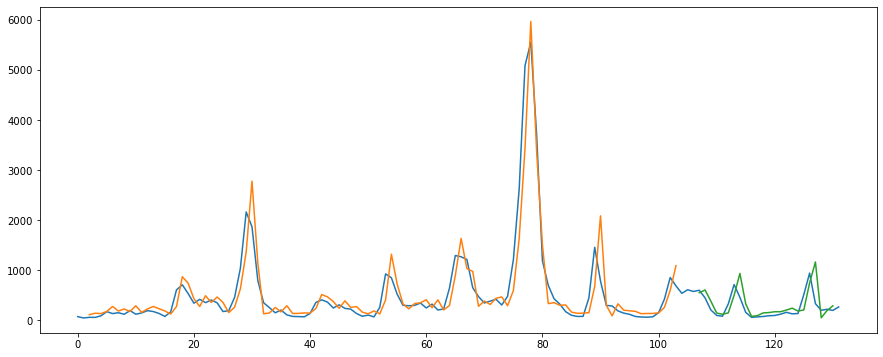

In [15]:
### Plotting 
# shift train predictions for plotting
look_back=2
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


# plot baseline and predictions
plt.figure(figsize = (15,6))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

In [16]:
#USER

In [57]:
user_df = pd.read_csv("DATA/user.csv")
user_df.head()

,state,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,Kerala,2021,1,91,24.23,78.44,3.23,100.20,15.08,31.70,17.69,24.695,19.75
1,Kerala,2021,2,117,25.50,64.50,0.75,21.09,12.88,35.40,16.61,26.005,17.05
2,Kerala,2021,3,154,27.53,63.00,1.53,47.46,14.10,36.12,19.33,27.725,18.37
3,Kerala,2021,4,124,27.65,73.69,2.23,66.99,17.03,37.44,22.58,30.010,21.68
4,Kerala,2021,5,130,26.15,84.75,9.96,308.71,18.43,34.02,22.50,28.260,23.08


In [58]:
# user_df = user_df.drop("cases", axis=1)
user_df = user_df.drop("state", axis=1)

In [59]:
user_df

,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,2021,1,91,24.23,78.44,3.23,100.20,15.08,31.70,17.69,24.695,19.75
1,2021,2,117,25.50,64.50,0.75,21.09,12.88,35.40,16.61,26.005,17.05
2,2021,3,154,27.53,63.00,1.53,47.46,14.10,36.12,19.33,27.725,18.37
3,2021,4,124,27.65,73.69,2.23,66.99,17.03,37.44,22.58,30.010,21.68
4,2021,5,130,26.15,84.75,9.96,308.71,18.43,34.02,22.50,28.260,23.08
5,2021,6,508,25.01,88.62,8.26,247.72,18.19,29.67,21.13,25.400,22.87
6,2021,7,938,24.32,91.25,12.29,380.94,18.01,28.20,22.05,25.125,22.71
7,2021,8,327,24.03,90.50,8.42,261.11,17.52,28.51,20.41,24.460,22.26
8,2021,9,194,24.33,90.50,7.28,218.52,17.82,29.17,21.54,25.355,22.57
9,2021,10,215,24.67,90.38,13.33,413.24,18.19,28.85,22.11,25.480,22.90


In [60]:
df1 = user_df["cases"]
df1

0      91
1     117
2     154
3     124
4     130
5     508
6     938
7     327
8     194
9     215
10    192
11    261
Name: cases, dtype: int64

In [61]:

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [62]:
df1.shape

(12, 1)

In [63]:

training_size = int(len(df1)*1)
test_size= len(df1)-training_size

train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [64]:
train_data.shape

(12, 1)

In [65]:
time_step = 2

X_train, y_train = create_dataset(train_data, time_step)

In [66]:
X_train.shape

(9, 2)

In [69]:
X_train = pd.DataFrame(X_train)
X_train

,0,1
0,0.000000,0.030697
1,0.030697,0.074380
2,0.074380,0.038961
3,0.038961,0.046045
4,0.046045,0.492326
5,0.492326,1.000000
6,1.000000,0.278630
7,0.278630,0.121606
8,0.121606,0.146399


In [70]:
y_train.shape

(9,)

In [71]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [72]:
train_predict=model.predict(X_train)

In [39]:
train_predict = scaler.inverse_transform(train_predict)
train_predict

array([[ 138.6419 ],
       [ 178.48904],
       [ 116.5167 ],
       [ 140.39322],
       [ 794.43335],
       [1094.4082 ],
       [ 225.52591],
       [ 109.53741],
       [ 218.75908]], dtype=float32)

In [40]:
math.sqrt(mean_squared_error(y_train, train_predict))

473.9216926939349

In [42]:
# y_true, y_pred = y_train, model.predict(X_train).astype(int)
# print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))